#Introducción
Sobre el set de datos de [Vino Tinto](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) existen en la literatura diferentes estudios, entre los que se encuentran  un relacionado con las preferencias para el vino blanco y el vino tinto utilizando métodos de clasificación binaria como Anális Discrminate, árboles de decisión y redes neuronales (Collazo et al., 2020). Además, (Galeano-Arias et al., 2021) propone un  análisis por medio de técnicas de inteligencia artificial con el objetivo de identificar las variables que mayor influyen en la calidad del vino, identificándose al alcohol, pH, sulfato y ácido cítrico como las de mayor peso.

El presente trabajo tiene como objetivo realizar un análisis estadístico que permita:
  - Predecir la calidad del vino a partir de características físico-químicas utilizando un modelo de red neuronal.

In [25]:
#Importación  de librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [4]:
# Cargar los datos
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')


In [6]:
conteo_valores = wine_data['quality'].value_counts()

#Red Neuroal
En el presente trabajo se ha entrenado una red neuronal con el set de datos para el [Análisis de Vino rojo](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv). Dicho conjunto de datos no resulta muy adecuado para el entrenamiento de una red neuronal que tenga la intención de predecir la calidad del vino a partir de las características de su composición, pues en la base de datos hay clases que se encuentran muy poco representada(ver siguiente Figura), lo que interfiere de manera negativa en el rendimiento del modelo propuesto.  Se ha utilizado un modelo de red neuronal de [TensorFlow](https://www.tensorflow.org/?hl=es-419), con dos capas ocultas de 64 neuronas cada una, con función de activación relu y una capa de salida con 6 neuronas, función de activación softmax y función de pérdida cross-entropy. Se tomó el 70\% de los datos para el entrenamiento del modelo y el resto para probar su desempeño. Sea ha utilizado un muestreo estratificado con el objetivo de garantizar que todas las clases estén presentes en el entrenamiento y disminuir el efecto de la poca representatividad de algunos grupos.

##Función de pérdida cross-entropy

Calcula la diferencia entre las distribuciones de probabilidad de las predicciones del modelo y las etiquetas verdaderas. En términos generales, cuanto mayor sea la discrepancia entre las predicciones y las etiquetas verdaderas, mayor será la pérdida de cross-entropy.

Para un conjunto de datos con N muestras, la pérdida promedio de cross-entropy se calcula como:
\begin{equation}
    L = -\frac{1}{N} \sum_{j=1}^{N} \sum_{i=1}^{C} y_{ji} \log(\hat{y}_{ji})
\end{equation}
Donde:
  - $L$ es la pérdida de cross-entropy.
  - $C$ es el número de clases.
  - $y_i$ es la etiqueta verdadera para la clase $i$ (1 si es la clase correcta, 0 de lo contrario).
  - $\hat{y}_i$ es la probabilidad predicha por el modelo para la clase $i$.

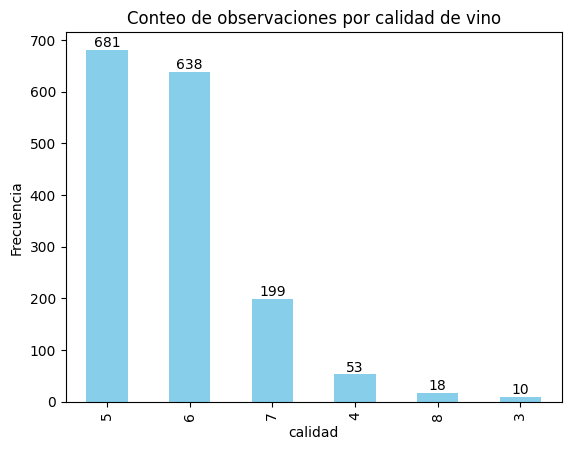

In [7]:
# Crear el gráfico de barras
ax = conteo_valores.plot(kind='bar', color='skyblue')

# Añadir título y etiquetas a los ejes
plt.title('Conteo de observaciones por calidad de vino')
plt.xlabel('calidad')
plt.ylabel('Frecuencia')

# Añadir los totales encima de las barras
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Mostrar el gráfico
plt.show()

In [8]:
# Separar las características y las etiquetas
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [9]:
# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir las etiquetas a categorías
y_categorical = to_categorical(y - y.min())

In [34]:
# Dividir los datos en entrenamiento y prueba usando muestreo estratificado
seed_value = 42
tf.random.set_seed(seed_value)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.3, random_state=seed_value, stratify=y)

In [35]:
 #Definir el modelo
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)


Epoch 1/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.2442 - loss: 1.7684 - precision: 0.2169 - recall: 0.0051 - val_accuracy: 0.5134 - val_loss: 1.3573 - val_precision: 0.2500 - val_recall: 0.0134
Epoch 2/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5405 - loss: 1.2771 - precision: 0.5880 - recall: 0.1092 - val_accuracy: 0.5179 - val_loss: 1.2052 - val_precision: 0.6023 - val_recall: 0.2366
Epoch 3/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5091 - loss: 1.1705 - precision: 0.5718 - recall: 0.2636 - val_accuracy: 0.5402 - val_loss: 1.1641 - val_precision: 0.5868 - val_recall: 0.3170
Epoch 4/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5732 - loss: 1.0933 - precision: 0.5982 - recall: 0.3399 - val_accuracy: 0.5446 - val_loss: 1.1481 - val_precision: 0.5804 - val_recall: 0.3705
Epoch 5/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6176 - loss: 1.0551 - precision: 0.6306 - recall: 0.3907 - val_accuracy: 0.5580 - val_loss: 1.1386

#Métricas de Desempeño
Para evaluar el desempeño de la red se han utilizado las métricas *Accuracy*, *Presición*, *Recall* y *F1 Score*, las que permiten medir la confiabilidad  del modelo para cada una de las clases relacionadas con la calidad del vino.

**Accuaracy**: mide la proporción de instancias correctamente clasificadas sobre el total de instancias.
\begin{equation}
    Acc = \frac{V_P + V_N}{Total \quad de \quad Casos}
\end{equation}

**Precisión**: mide la exactitud de las predicciones positivas.
\begin{equation}
    Prec = \frac{V_P}{V_P + F_P}
\end{equation}

**Sensibilidad (Recall)**: mide la proporción de positivos reales correctamente identificados.
\begin{equation}
    Recall = \frac{V_P}{V_P + F_N}
\end{equation}

**F1 Score**:La media armónica de la precisión y la sensibilidad.
\begin{equation}
    F1 = 2 \times \frac{Prec \times Recall}{Prec + Recall}
\end{equation}

Donde:

$V_P$: verdaderos positivos(el modelo lo identificó como perteneciente a la clase y realmente lo son)

$V_N$: verdaderos negativos(el modelo los identificó como perteneciente a la clase y no lo son)

$F_P$: falsos positivos(el modelo lo identificó como perteneciente a otra clase y erroneamente)

$F_N$: falsos negativos(el modelo lo identificó como perteneciente a otra clase correctamente)

In [37]:
# Evaluar el modelo
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)
print('Test precision:', test_precision)
print('Test recall:', test_recall)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6025 - loss: 1.2358 - precision: 0.6314 - recall: 0.5652 
Test loss: 1.025830626487732
Test accuracy: 0.6208333373069763
Test precision: 0.6380510330200195
Test recall: 0.5729166865348816


In [38]:
# Predecir las etiquetas
y_pred = model.predict(X_test)

# Convertir las predicciones y las etiquetas verdaderas a clases
y_true_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


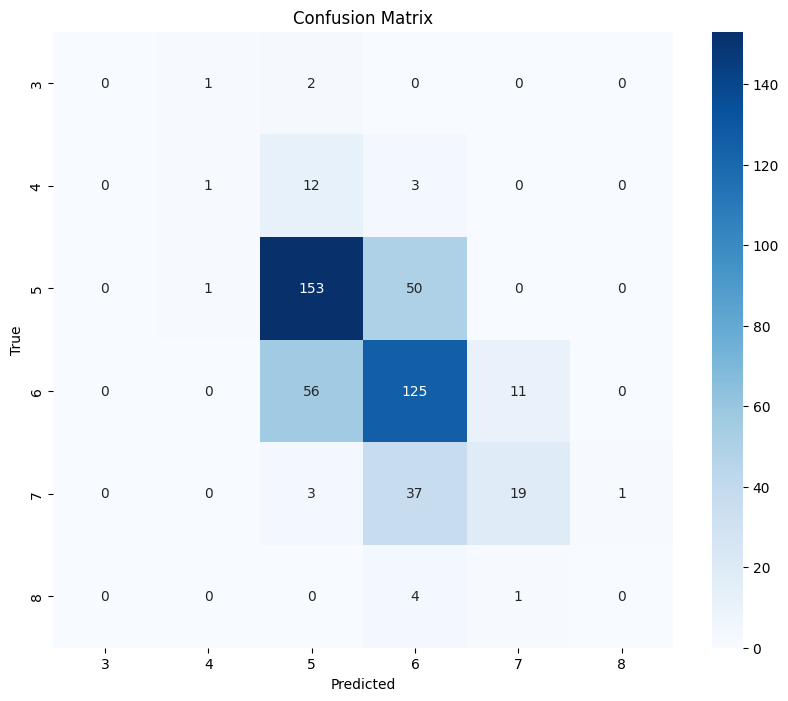

In [39]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Guardar la matriz de confusión como imagen
plt.savefig('confusion_matrix.png')

# Mostrar la matriz de confusión
plt.show()


#Historial de entrenamineto de la red
En la siguiente gráfica se puede observar que hay diferencias en los valores alcanzados por la función de pérdida en los conjuntos de entrenamiento y prueba, en el primero se comporta como lo esperado, disminuyendo en las diferentes etapas del entrenamiento, sin embargo en el conjunto de prueba sucede lo contrario, la red no mejora su desempeño en el proceso de entrenamiento, lo que se atribuye a la poca representatividad de algunas clases en el conjunto de prueba. También se puede observar que en las distintas métricas evaluadas el progreso en los datos de entrenamiento es considerable, mientras que en los de validación no es tan evidente, con la excepción de la *Recall* en la que se observa una mejora pero obteniendo siempre valores muy inferiores a los resultados alcanzados con el conjunto de entrenamiento.

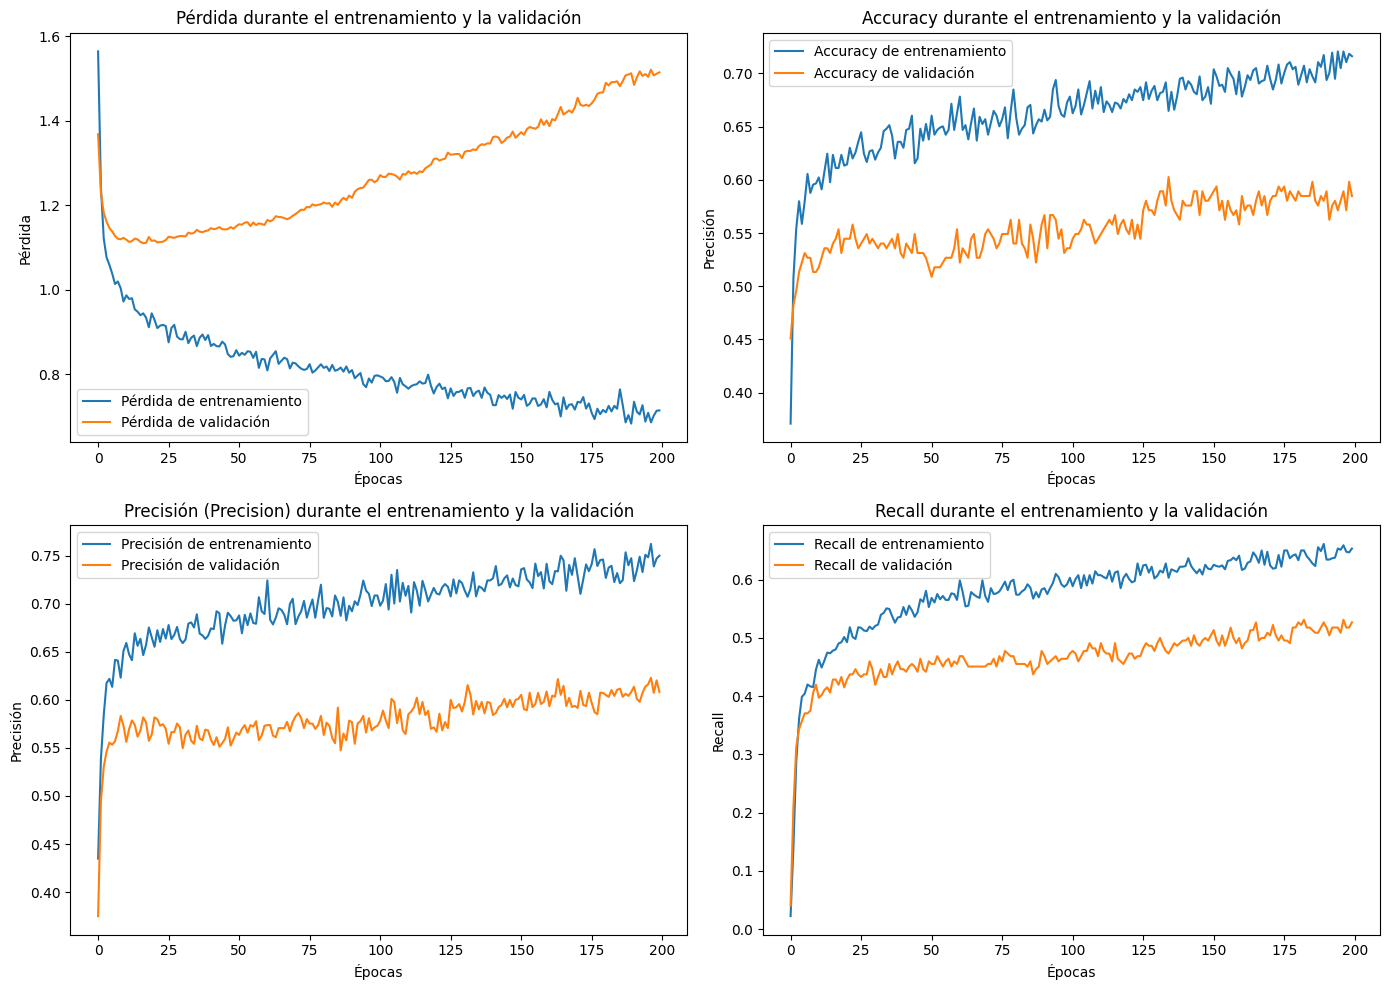

In [32]:
# Graficar la pérdida
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Graficar la precisión
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy de validación')
plt.title('Accuracy durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar la precisión (Precision)
plt.subplot(2, 2, 3)
plt.plot(history.history['precision'], label='Precisión de entrenamiento')
plt.plot(history.history['val_precision'], label='Precisión de validación')
plt.title('Precisión (Precision) durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar el recall
plt.subplot(2, 2, 4)
plt.plot(history.history['recall'], label='Recall de entrenamiento')
plt.plot(history.history['val_recall'], label='Recall de validación')
plt.title('Recall durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Recall')
plt.legend()

plt.savefig('rendimiento.png')


plt.tight_layout()
plt.show()

In [33]:
# Mostrar el reporte de clasificación
report = classification_report(y_true_classes, y_pred_classes, target_names=[str(i) for i in np.unique(y)], output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
3,0.000000,0.000000,0.000000,3.00000
4,0.000000,0.000000,0.000000,16.00000
5,0.678261,0.764706,0.718894,204.00000
6,0.587156,0.666667,0.624390,192.00000
7,0.678571,0.316667,0.431818,60.00000
8,0.000000,0.000000,0.000000,5.00000
accuracy,0.631250,0.631250,0.631250,0.63125
macro avg,0.323998,0.291340,0.295850,480.00000
weighted avg,0.607945,0.631250,0.609263,480.00000


#Resultados
Como se había comentado anteriormente las predicciones hechas por el modelo no son las mejores, pues como se puede observar en la Tabla anterior, para los vinos que están etiquetados con calidad 3, 4 y 8 es muy baja, en el caso de los vinos de calidad 3 no logró clasificar como verdadero ningún caso(ver Matriz de confusión), debido a que en el conjunto de entrenamiento y prueba hay muy pocas observaciones. Los mejores resultados en la predicción lo han alcanzado los vinos con calidad 5, 6 y 7, lográndose identificar como verdaderos positivos 156, 120 y 19 casos respectivamente, obsérvese que dichas clases son las que mayor representadas están en el proceso de entrenamientos, pues hay mayor cantidad de registros en la base de datos(ver gráfico de conteo por clases). En estos grupos el el 68, 58 y 63\% de las predicciones positivas han sido correctas. Sin embargo el porciento de positivos reales correctamente identificados en los vinos de calidad 7 alcanza apenas el 31\%, pues hay 36 casos que el modelo clasificó como de calidad 6 cuando en realidad eran de 7(ver Matriz de confusión). Mientras que en los de calidad 5 y 6 alcanzaron el 73 y 69\% respectivamente de positivos reales correctamente identificados.
Finalmente la red permite clasificar correctamente el 63\% de los casos, lo que indica que el modelo puede ser mejorado a partir de un balance en el set de datos que permita tener mayor cantidad de observaciones en las clases poco representadas, por lo que se sugiere utilizar técnicas como SMOTE (*Synthetic Minority Over-sampling Technique*) o *Bootstrap*, para generar nuevas muestras sintéticas.

#Conclusiones       
  - Hay algunas clases en las que las métricas de desempeño han sido bajas(calidad 3, 4 y 8) a causa del desequilibrio de los datos.
  - Las clases con mayor representación han alcanzado una precisión por encima del 58\%.
  - El promedio de las métricas ponderadas(Weighted avg) alcanza valores mayores que 60\%.
  - De modo general el modelo de red neuronal permite clasificar correctamente el 63\% de los casos.